<h2 style="color: #4CAF50;">🎮 Project Overview – Game Behavior Analysis and Player Retention</h2>

<ul>
  <li><strong>Objective:</strong> Build a machine learning model to predict player engagement level (<code>High</code>, <code>Medium</code>, <code>Low</code>) based on gameplay behavior and demographic data.</li>
</ul>

<h3 style="color: #2196F3;">📊 Dataset Features:</h3>
<ul>
  <li><strong>PlayerID</strong>: Unique player identifier (not used for modeling)</li>
  <li><strong>Age</strong>: Age of the player</li>
  <li><strong>Gender</strong>: Player's gender</li>
  <li><strong>Location</strong>: Geographic location of the player</li>
  <li><strong>GameGenre</strong>: Genre of the game</li>
  <li><strong>PlayTimeHours</strong>: Average hours played per session</li>
  <li><strong>InGamePurchases</strong>: 0 = No, 1 = Yes</li>
  <li><strong>GameDifficulty</strong>: Difficulty level of the game</li>
  <li><strong>SessionsPerWeek</strong>: Weekly gaming sessions</li>
  <li><strong>AvgSessionDurationMinutes</strong>: Avg. session duration in minutes</li>
  <li><strong>PlayerLevel</strong>: Current game level</li>
  <li><strong>AchievementsUnlocked</strong>: Number of achievements unlocked</li>
  <li><strong>EngagementLevel</strong>: <em>(Target)</em> Player engagement level</li>
</ul>

<h3 style="color: #FF9800;">🎯 Project Goals:</h3>
<ul>
  <li>Explore and visualize player data</li>
  <li>Identify features that influence engagement</li>
  <li>Build classification models to predict engagement</li>
  <li>Evaluate models using performance metrics</li>
  <li>Deploy in a simulated environment</li>
</ul>

<h3 style="color: #9C27B0;">🛠️ Tools & Libraries:</h3>
<ul>
  <li>Python, Jupyter Notebook</li>
  <li>Pandas, NumPy, Scikit-learn</li>
  <li>Matplotlib, Seaborn</li>
</ul>


# **Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# **Loading and exploring the dataset**

### **Loading the Dataset**

In [52]:
df = pd.read_csv("online_gaming_behavior_dataset.csv")

### **Exploring the Dataset**

In [53]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [54]:
df.shape

(40034, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

**We found that the data has no NULL values.**

The classification task involves predicting the **EngagementLevel**, which falls into three distinct classes: **High**, **Medium**, and **Low**, making it a **multi-class classification** problem.

In [56]:
df.describe().T

count          mean           std          min  \
PlayerID                   40034.0  29016.500000  11556.964675  9000.000000   
Age                        40034.0     31.992531     10.043227    15.000000   
PlayTimeHours              40034.0     12.024365      6.914638     0.000115   
InGamePurchases            40034.0      0.200854      0.400644     0.000000   
SessionsPerWeek            40034.0      9.471774      5.763667     0.000000   
AvgSessionDurationMinutes  40034.0     94.792252     49.011375    10.000000   
PlayerLevel                40034.0     49.655568     28.588379     1.000000   
AchievementsUnlocked       40034.0     24.526477     14.430726     0.000000   

                                    25%           50%           75%  \
PlayerID                   19008.250000  29016.500000  39024.750000   
Age                           23.000000     32.000000     41.000000   
PlayTimeHours                  6.067501     12.008002     17.963831   
InGamePurchases                0.000000      0.000000      0.000000   
SessionsPerWeek                4.000000      9.000000     14.000000   
AvgSessionDurationMinutes     52.000000     95.000000    137.000000   
PlayerLevel                   25.000000     49.000000     74.000000   
AchievementsUnlocked          12.000000     25.000000     37.000000   

                                    max  
PlayerID                   49033.000000  
Age                           49.000000  
PlayTimeHours                 23.999592  
InGamePurchases                1.000000  
SessionsPerWeek               19.000000  
AvgSessionDurationMinutes    179.000000  
PlayerLevel                   99.000000  
AchievementsUnlocked          49.000000

## 📊 Key Insights from Descriptive Statistics

- **Dataset Size**: The dataset contains `40,034` players.

- **Age**:
  - Average age is **~32 years**.
  - Youngest player is **15**, oldest is **49**, indicating a wide age range among gamers.

- **Play Time (Hours per Session)**:
  - Average playtime per session is around **12 hours**, with some players playing almost **24 hours**.
  - A large spread in playtime (std = ~6.91), showing different play styles.

- **In-Game Purchases**:
  - Only **20%** of users make in-game purchases, indicating most players don't spend money directly in-game.
  - It is a **binary variable** (0 or 1).

- **Sessions Per Week**:
  - On average, players have about **9.47 sessions per week**.
  - Some play up to **19 sessions weekly**, while some have **0 sessions**, which might need further inspection.

- **Average Session Duration (Minutes)**:
  - Mean session duration is approximately **95 minutes**.
  - Some sessions last up to **179 minutes**, suggesting potential binge gaming for some users.

- **Player Level**:
  - The average level is **~50**, with a range from level **1 to 99**.
  - 75% of players are below level **74**, suggesting a moderately experienced player base.

- **Achievements Unlocked**:
  - Players have unlocked an average of **24 achievements**.
  - Maximum achievements unlocked is **49**, which may represent the full set or a very active player.
  - This feature may strongly correlate with engagement.

In [57]:
df.isna().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [58]:
df.duplicated().sum()

0

**No NULL values and No Duplicates**

In [59]:
df.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [60]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

Gender
Male      23959
Female    16075
Name: count, dtype: int64
Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64
GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64
GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64
EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


### User Data Summary

#### Gender
- The majority of users are male, indicating a gender imbalance.

#### Location
- Most users are from the USA, followed by Europe and Asia.
- This suggests the platform has stronger reach in Western regions.

#### Game Genre
- User preferences are evenly distributed across all genres.
- No dominant genre, showing a balanced variety of interests.

#### Game Difficulty
- Easy mode is the most preferred.
- As difficulty increases, user preference decreases.

#### Engagement Level
- Most users show medium engagement.
- High and low engagement levels are nearly equal, suggesting stable but improvable engagement.

# Exploratory Data Analysis (EDA)

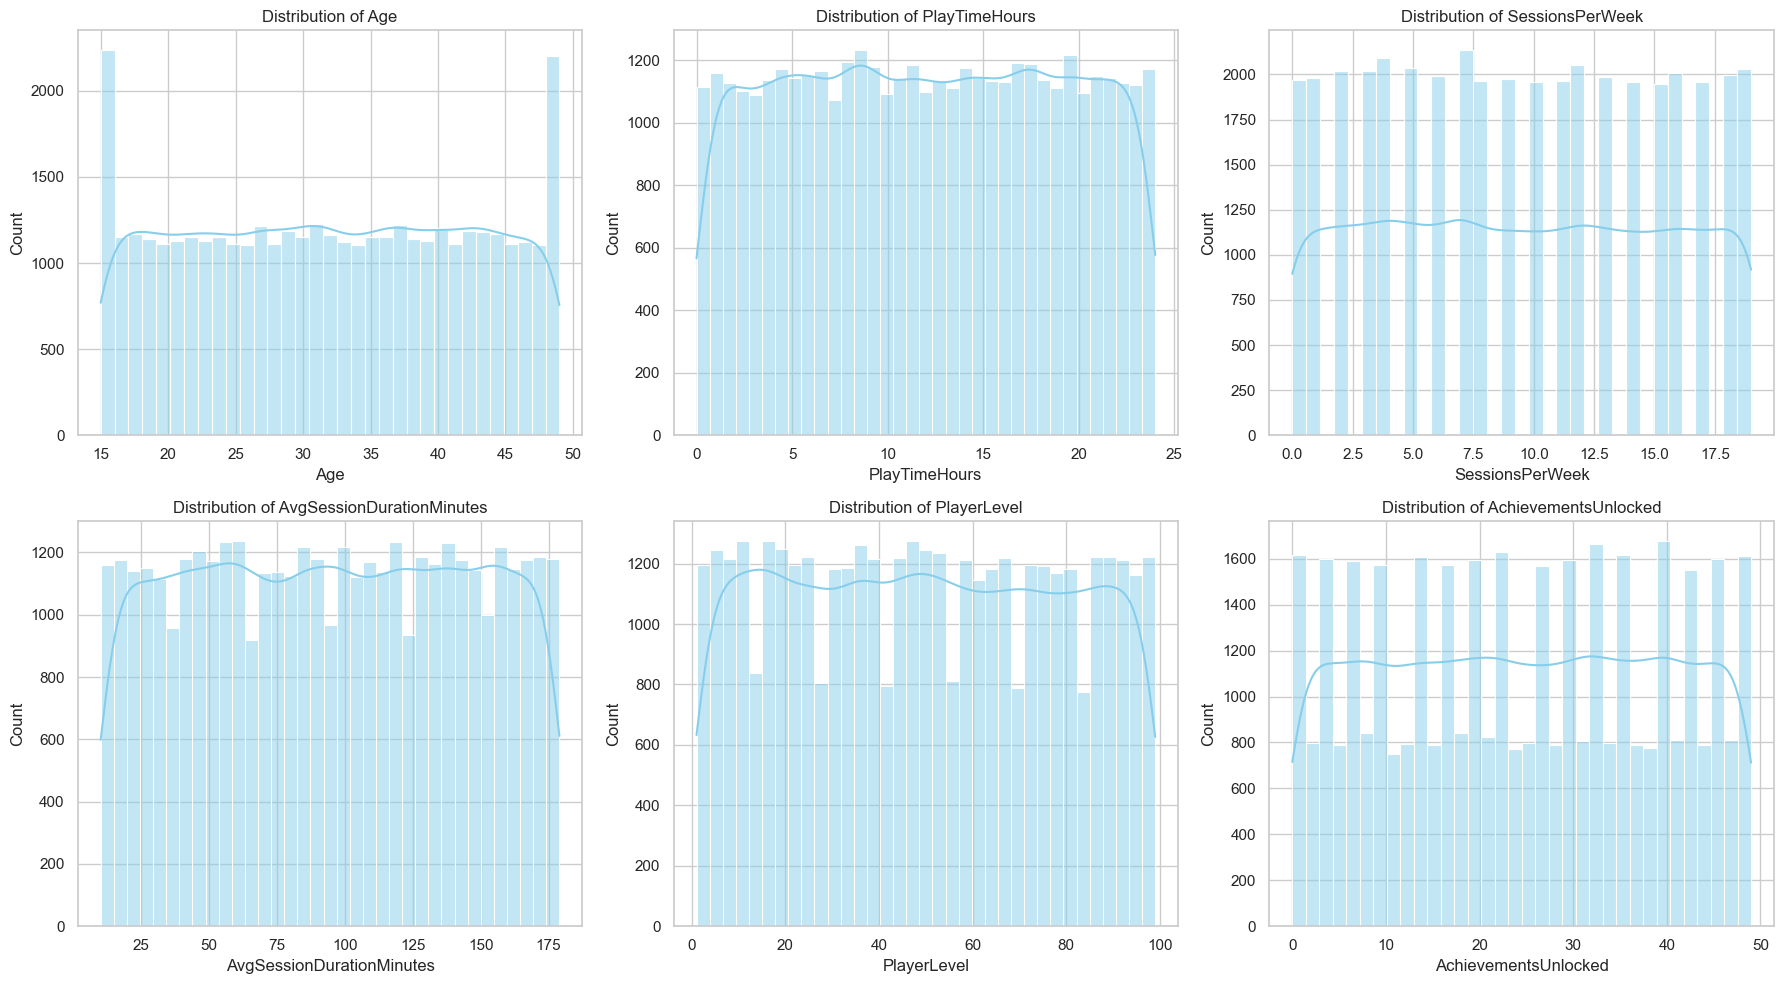

In [61]:
numeric_features = [
    'Age', 
    'PlayTimeHours', 
    'SessionsPerWeek', 
    'AvgSessionDurationMinutes', 
    'PlayerLevel', 
    'AchievementsUnlocked'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten() 

for i, feature in enumerate(numeric_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()

### Notes on Numeric Features

- **Age**: Has spikes at 15 and 50 → might need cleaning.
- **PlayTimeHours**: Most players play between 5–20 hours → looks fine.
- **SessionsPerWeek**: Evenly spread with small peaks → okay.
- **AvgSessionDurationMinutes**: Sessions are mostly 60–120 mins → good range.
- **PlayerLevel**: Spread across all levels → balanced.
- **AchievementsUnlocked**: Random spread → no major issues.

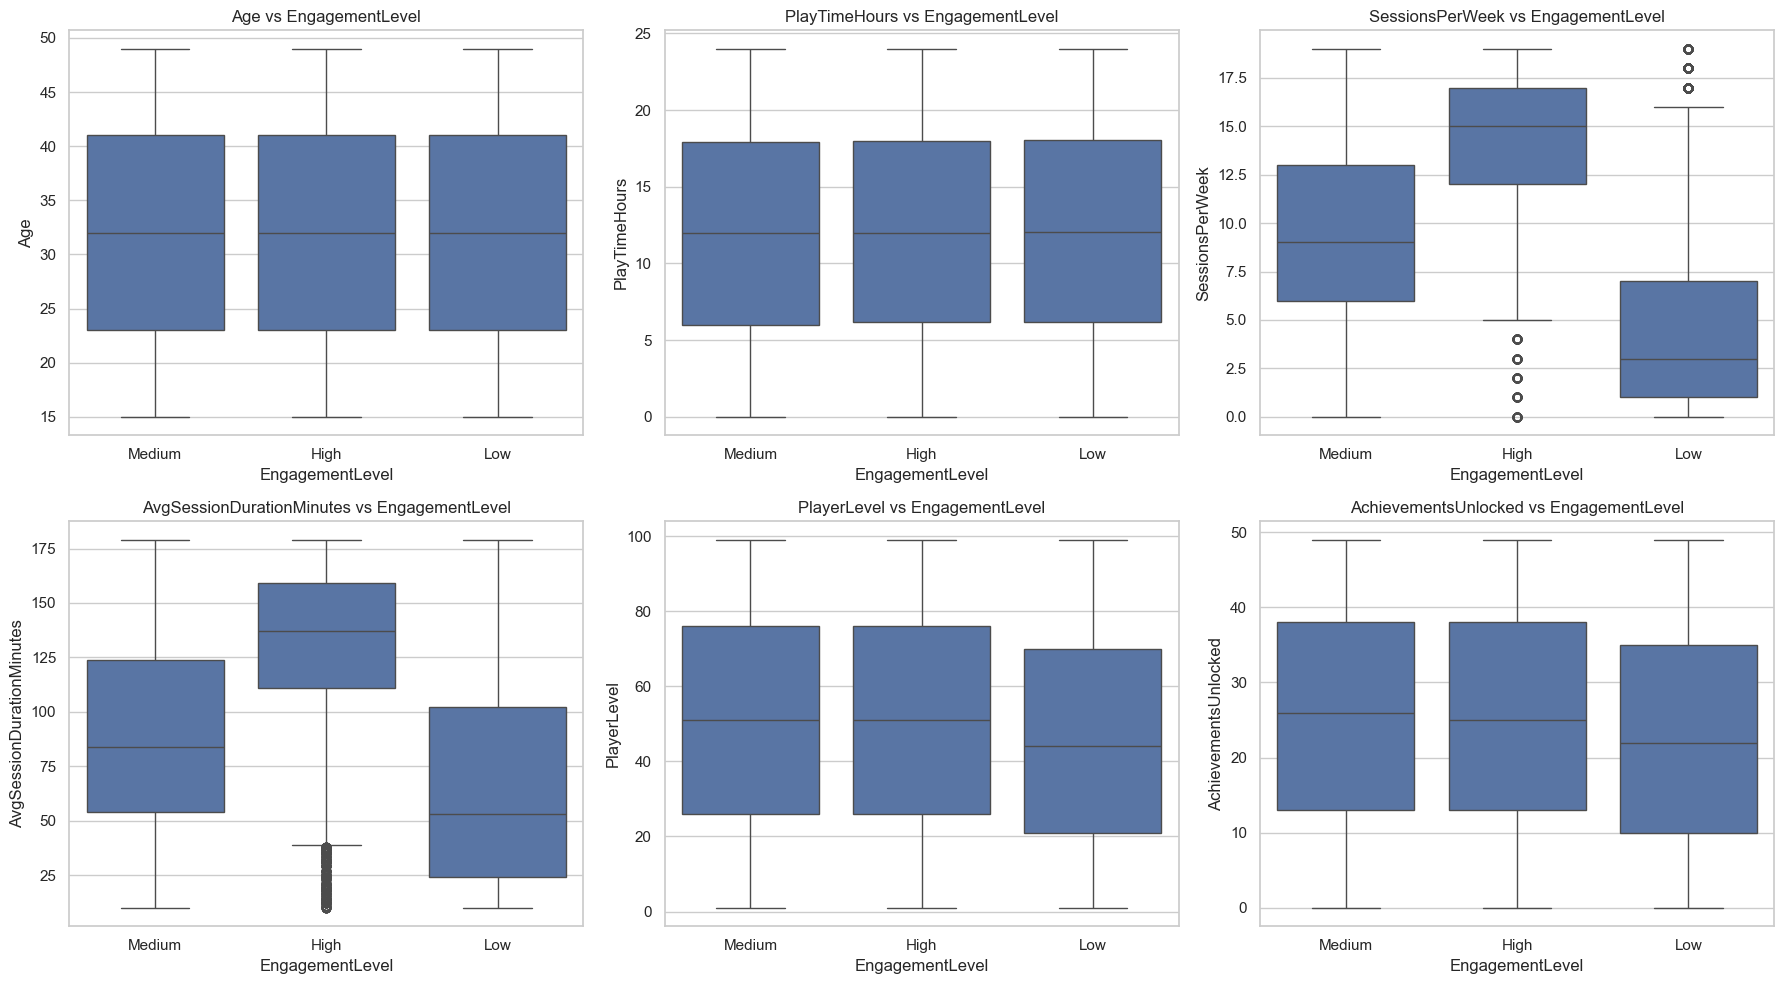

In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxplot(x='EngagementLevel', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs EngagementLevel')

plt.tight_layout()

### Boxplots

- **Age**: Similar distribution across all engagement levels → not a strong factor.
- **PlayTimeHours**: No big difference → may have limited impact.
- **SessionsPerWeek**: Higher in "High" engagement → good predictor.
- **AvgSessionDurationMinutes**: Clearly higher for "High" engagement → strong indicator.
- **PlayerLevel**: Higher levels relate to higher engagement.
- **AchievementsUnlocked**: More achievements = more engagement.

##### Some features (like SessionsPerWeek and AvgSessionDuration) show outliers that may need attention.


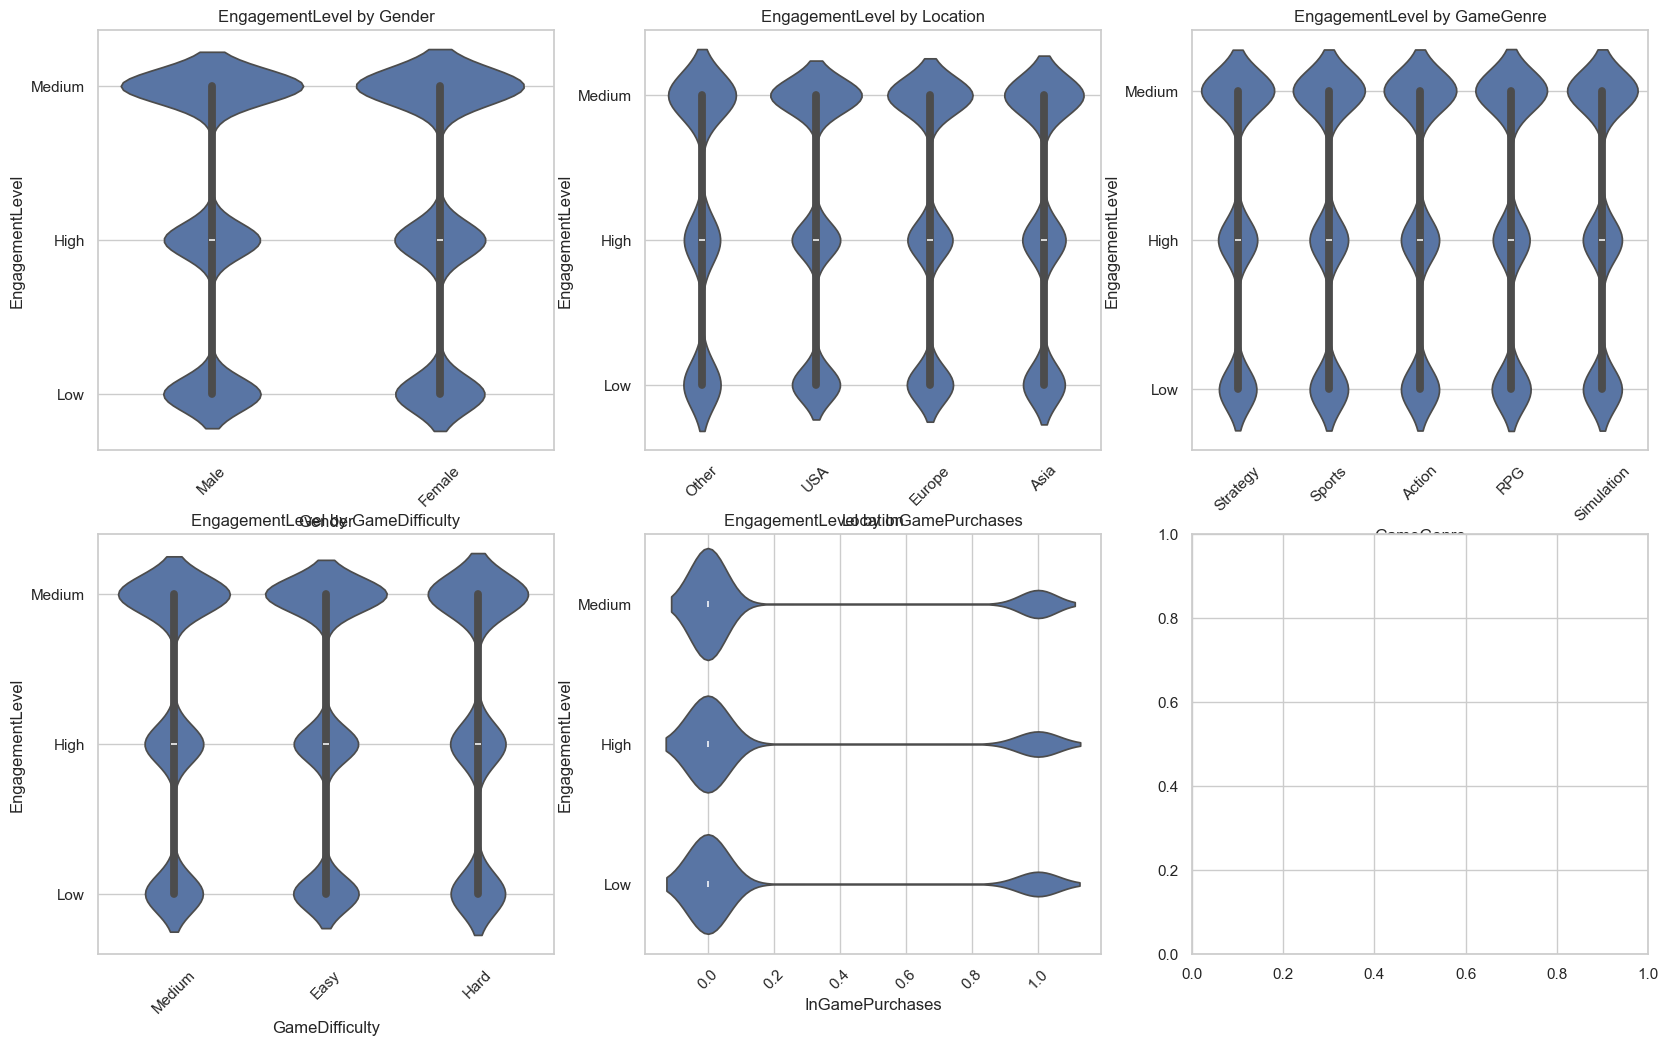

In [63]:
categorical_features = [
    'Gender',
    'Location',
    'GameGenre',
    'GameDifficulty',
    'InGamePurchases'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.violinplot(x=feature, y='EngagementLevel', data=df, ax=axes[i])
    axes[i].set_title(f'EngagementLevel by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

### Violin Plots: Categorical Features vs Engagement Level

- **Gender**: Engagement level distribution is similar for males and females → no strong effect.
- **Location**: Slight differences between regions, but mostly similar → weak indicator.
- **GameGenre**: Small variation across genres → might have minor influence.
- **GameDifficulty**: Players in harder games show slightly higher engagement.
- **InGamePurchases**: Players who make purchases tend to have higher engagement.

##### These features might still be useful after encoding, but their direct influence is limited.


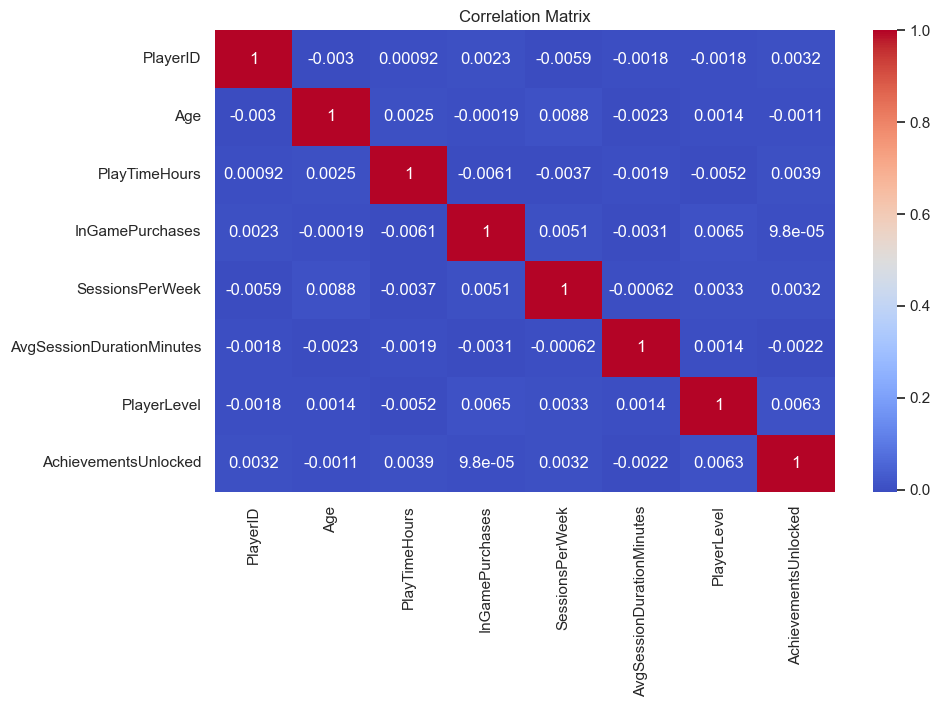

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64


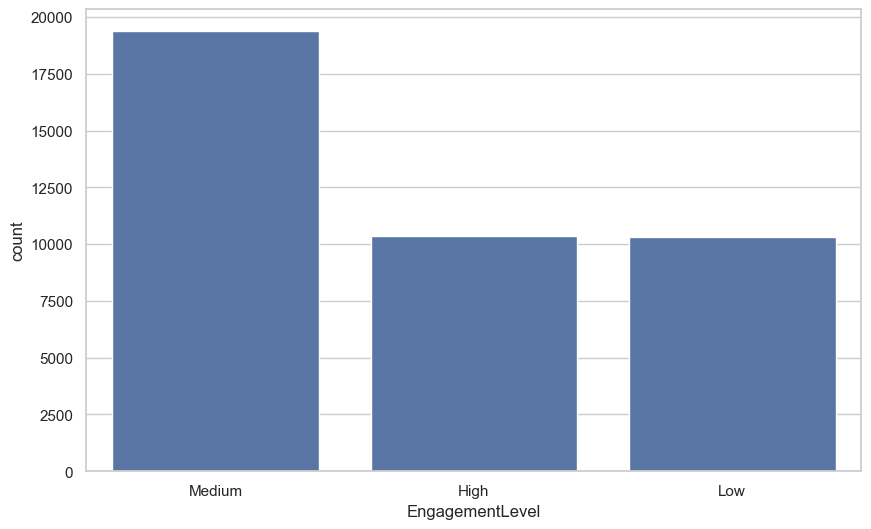

In [65]:
sns.countplot(x='EngagementLevel', data=df)
print(df['EngagementLevel'].value_counts())

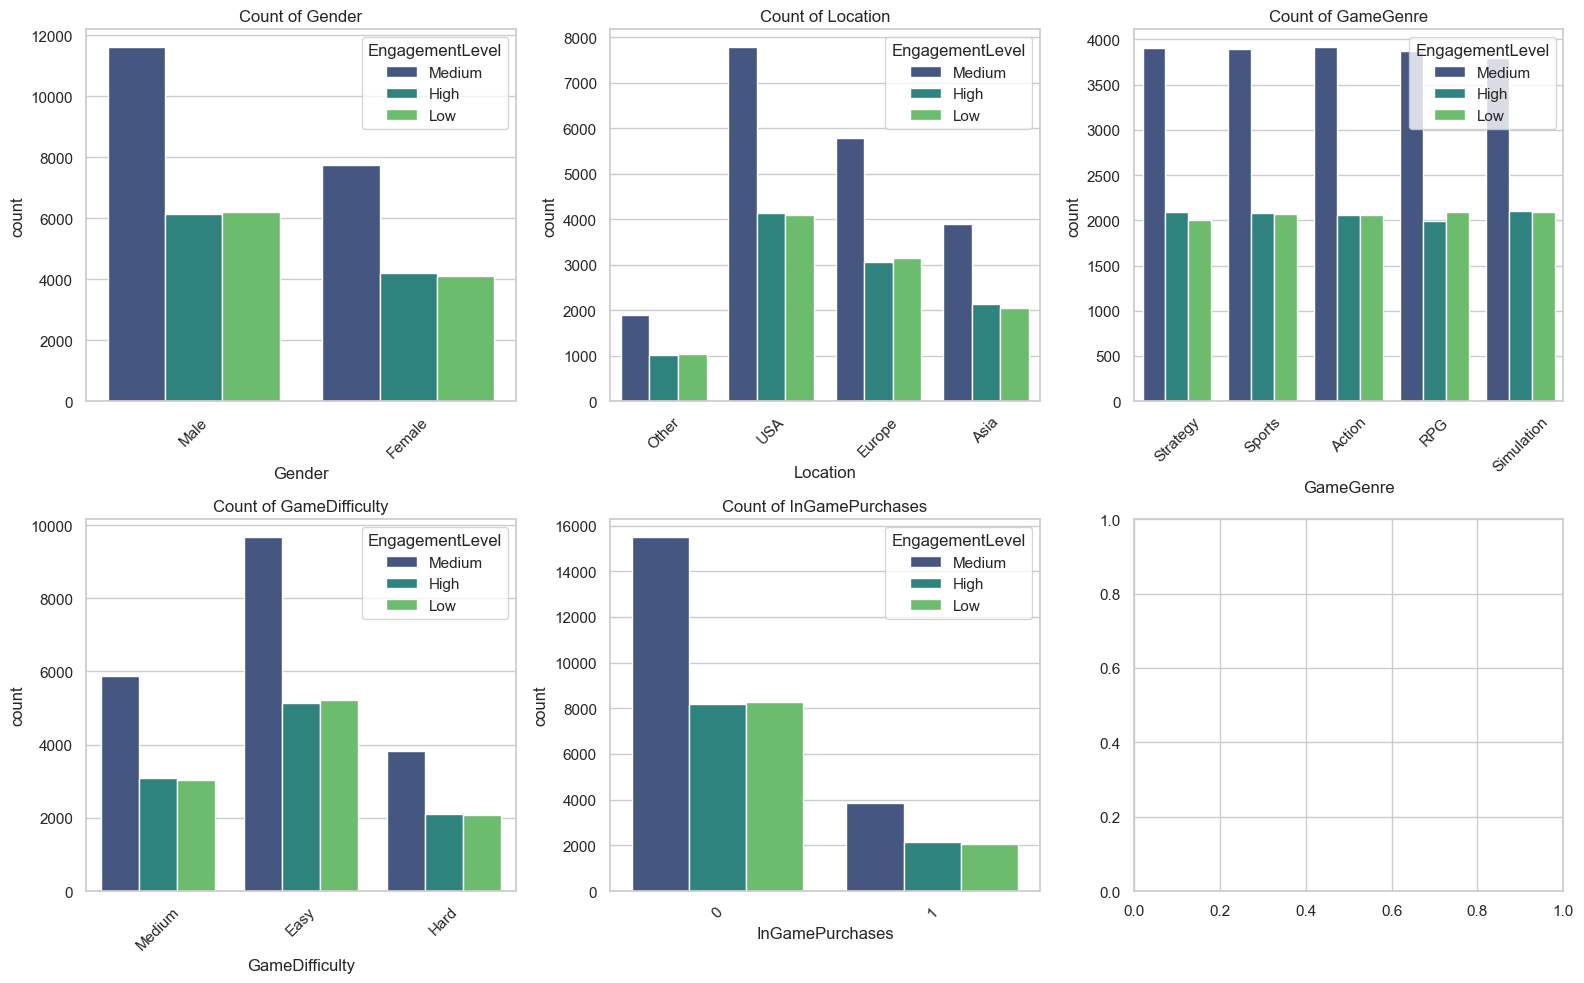

In [66]:
categorical_features = [
    'Gender',
    'Location',
    'GameGenre',
    'GameDifficulty',
    'InGamePurchases'
]
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, ax=axes[i],hue='EngagementLevel',palette='viridis')
    axes[i].set_title(f'Count of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Class Imbalance in Engagement Levels

During data analysis, we observed that one class in the `EngagementLevel` feature has significantly more samples than the others.

This class imbalance can negatively affect model performance by making it biased toward the majority class.

---

### Solution:

To address this issue, we will apply **class balancing techniques** such as:

- **Oversampling** the minority classes (e.g., using SMOTE)
- **Undersampling** the majority class
- Or using **class weights** in the model

These methods help the model learn equally from all engagement levels and improve overall fairness and accuracy.


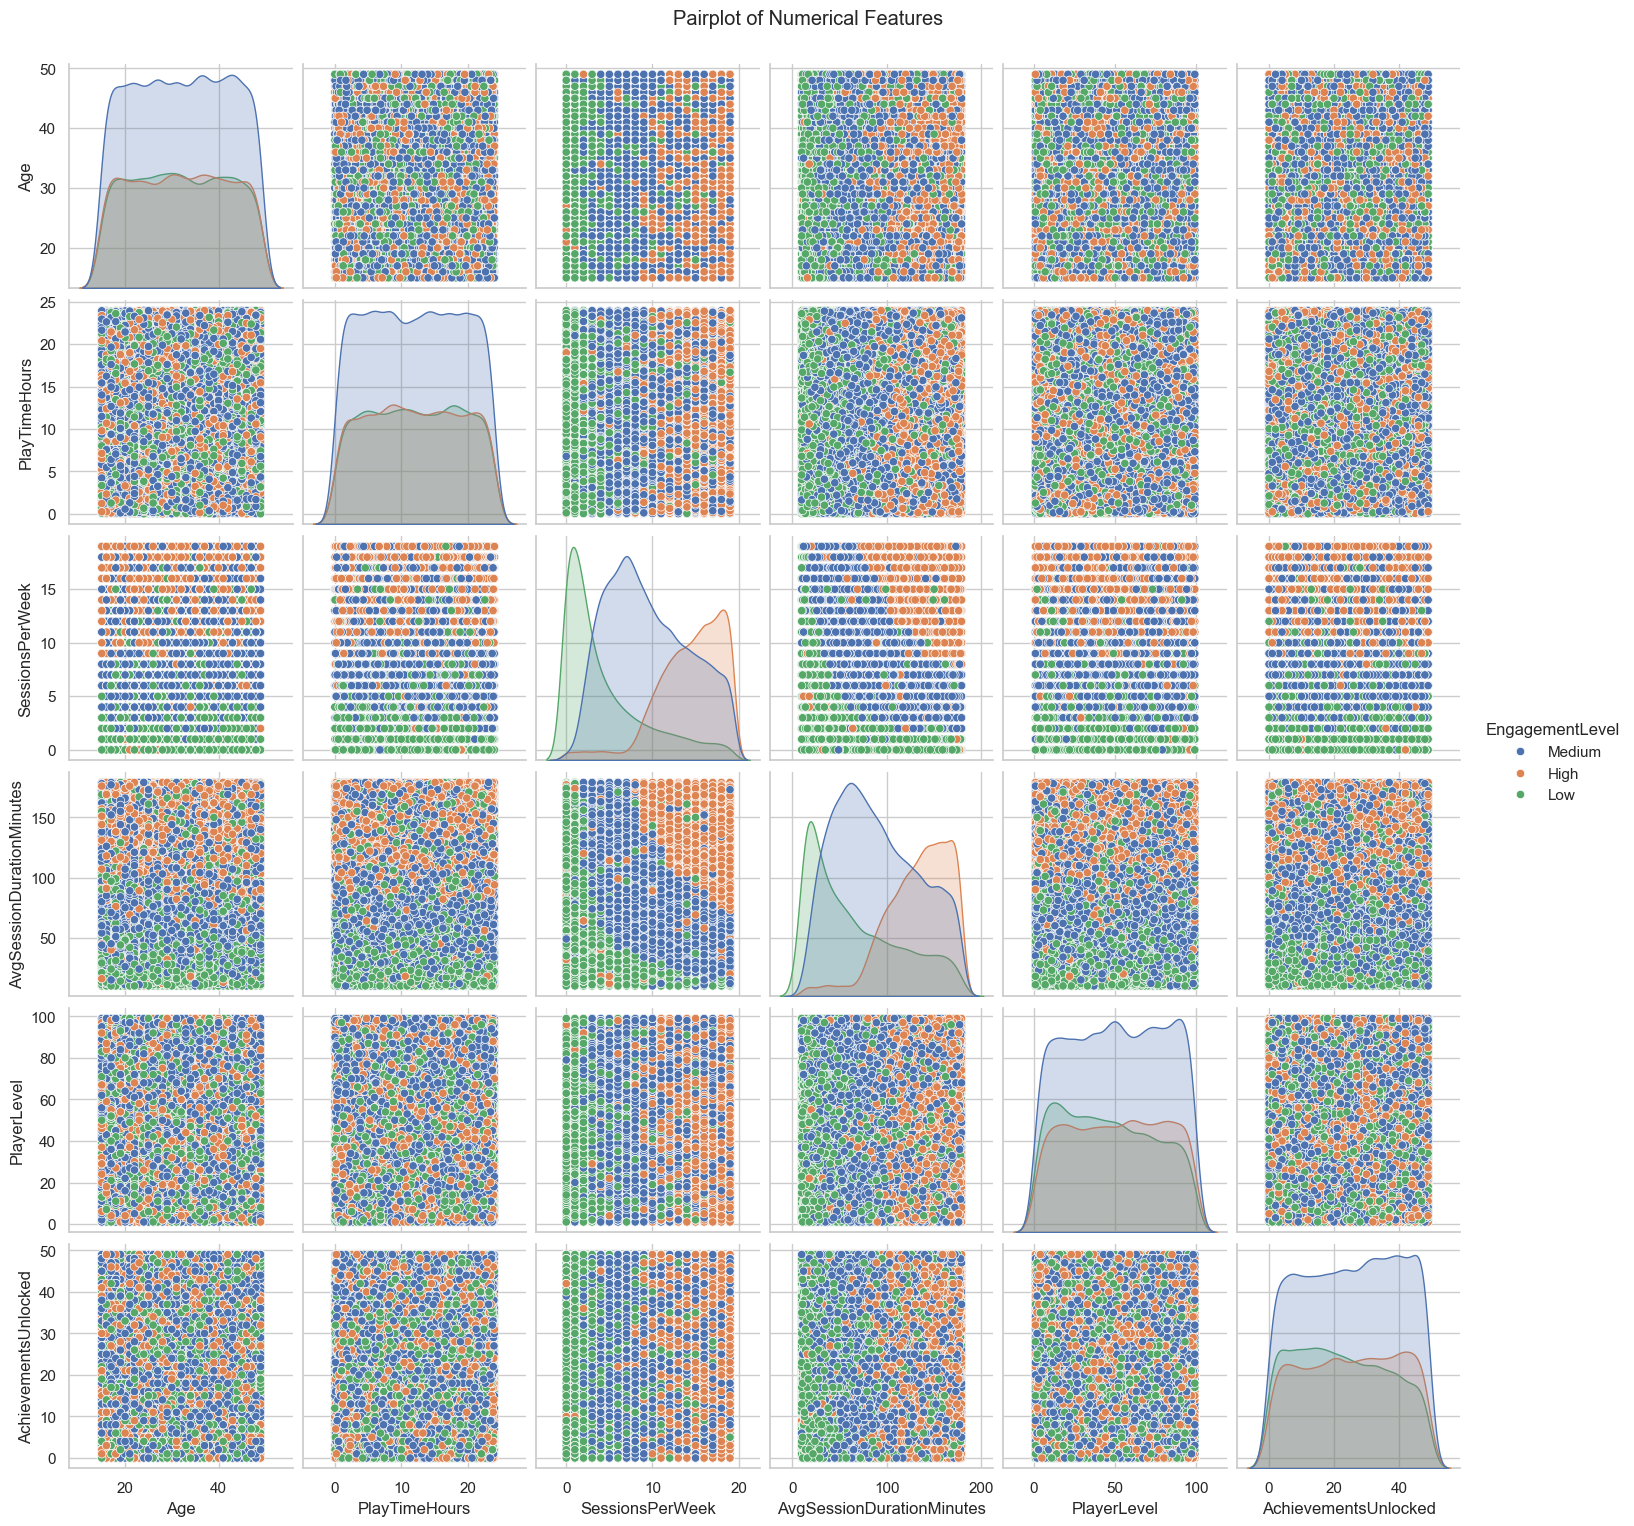

In [67]:
sns.pairplot(df, hue='EngagementLevel', vars=numeric_features)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


## Pairplot Analysis of Player Engagement

---

### 🔍 Key Observations:

- **SessionsPerWeek**:
  - Players with **High engagement** tend to have more sessions per week.
  - Good feature to distinguish engagement levels.

- **AvgSessionDurationMinutes**:
  - Players with **High engagement** usually spend more time per session.

- **PlayTimeHours**:
  - Slight trend: High engagement players tend to play longer.

- **Age**:
  - No clear difference across engagement levels.

- **PlayerLevel** and **AchievementsUnlocked**:
  - Distributions are similar across all engagement levels.
  - Might not be strong indicators on their own.

---

### Conclusion:

Some features like `SessionsPerWeek` and `AvgSessionDurationMinutes` show clear separation between engagement levels, while others like `Age` or `AchievementsUnlocked` seem less informative.

# Data Preprocessing

<h3>🚀 Data Preprocessing & Modeling Checklist</h3>

<ul>
  <li>✅ <strong>Handle Missing Values</strong></li>
  <li>✅ <strong>Remove Outliers</strong></li>
  <li>✅ <strong>Feature Scaling</strong></li>
  <li>✅ <strong>Encode Categorical Features</strong></li>
  <li>🔲 <strong>Apply SMOTE (Handle Class Imbalance)</strong></li>
  <li>🔲 <strong>Create New Features (Feature Engineering)</strong></li>
  <li>🔲 <strong>Feature Selection</strong></li>
  <li>🔲 <strong>Model Building & Hyperparameter Tuning</strong></li>
  <li>🔲 <strong>Model Evaluation (Accuracy, F1, Confusion Matrix)</strong></li>
  <li>🔲 <strong>Cross-validation (e.g. 5-Fold)</strong></li>
  <li>🔲 <strong>Model Saving (joblib / pickle)</strong></li>
  <li>🔲 <strong>Model Inference on New Data</strong></li>
</ul>


In [68]:
def remove_outliers_grouped(df, group_col, numeric_cols):
    df_clean = pd.DataFrame()

    for name, group in df.groupby(group_col):
        temp = group.copy()
        for col in numeric_cols:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.25 * IQR
            upper = Q3 + 1.25 * IQR
            temp = temp[(temp[col] >= lower) & (temp[col] <= upper)]
        df_clean = pd.concat([df_clean, temp], axis=0)

    return df_clean.reset_index(drop=True)

# تطبيق الدالة
df_clean = remove_outliers_grouped(df, 'EngagementLevel', numeric_features)


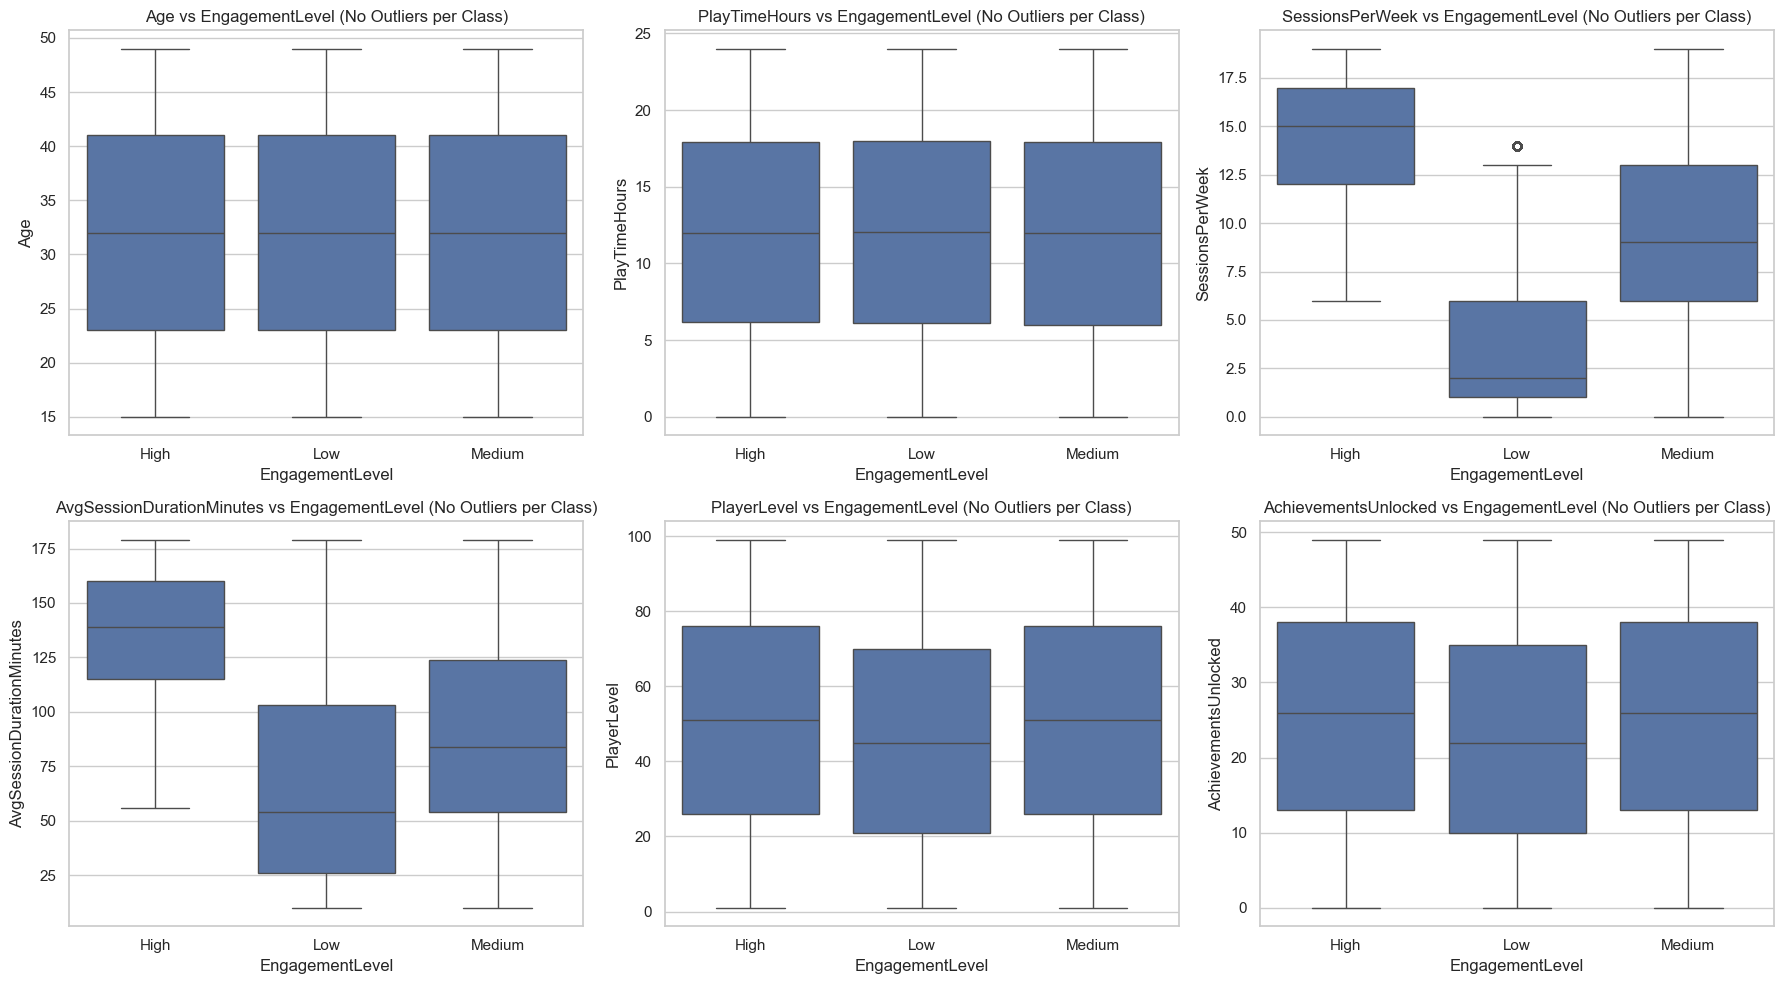

In [69]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='EngagementLevel', y=col, data=df_clean)
    plt.title(f'{col} vs EngagementLevel (No Outliers per Class)')
plt.tight_layout()
plt.show()


In [70]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [73]:
df_encoded = df.copy()

le_gender = LabelEncoder()
df_encoded['Gender'] = le_gender.fit_transform(df_encoded['Gender'])

le_target = LabelEncoder()
df_encoded['EngagementLevel'] = le_target.fit_transform(df_encoded['EngagementLevel'])

categorical_ohe = ['Location', 'GameGenre', 'GameDifficulty']
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded = ohe.fit_transform(df_encoded[categorical_ohe])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_ohe))

df_encoded = df_encoded.drop(columns=categorical_ohe).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

## Feature Engineering

In [76]:
df_encoded['EngagementPerSession'] = df_encoded['AchievementsUnlocked'] / (df_encoded['SessionsPerWeek'] + 1)

In [77]:
df_encoded['WeeklyPlayTime'] = df_encoded['PlayTimeHours'] * (df_encoded['SessionsPerWeek'] + 1)

In [78]:
df_encoded['IntensityScore'] = df_encoded['WeeklyPlayTime'] * df_encoded['AchievementsUnlocked'] * df_encoded['PlayerLevel']

In [80]:
col = df_encoded['EngagementLevel']
df_encoded = df_encoded.drop('EngagementLevel', axis=1)
df_encoded['EngagementLevel'] = col
df_encoded

PlayerID       Age  Gender  PlayTimeHours  InGamePurchases  \
0          9000  1.096023       1       0.614176                0   
1          9001 -0.297969       0      -0.939816                0   
2          9002 -0.994965       0      -0.549654                0   
3          9003  0.299456       1      -0.977506                1   
4          9004  0.100314       1       0.507275                0   
...         ...       ...     ...            ...              ...   
40029     49029  0.000744       1       1.243074                0   
40030     49030  1.195594       0       0.219091                0   
40031     49031 -1.691961       0      -1.704277                1   
40032     49032  0.199885       1       0.288298                1   
40033     49033 -1.293677       1      -0.280649                0   

       SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0            -0.602363                   0.269487     1.026459   
1            -0.775865                   1.004019    -1.352160   
2             1.132666                   0.963212    -0.512647   
3            -0.081854                  -0.199798     0.256906   
4            -1.296374                   0.738771     1.586134   
...                ...                        ...          ...   
40029        -0.949368                  -0.403835     1.236337   
40030         1.653174                   0.391909     0.746622   
40031         0.091649                   1.656937    -0.722525   
40032        -1.122871                   0.677560     0.711642   
40033         0.612157                  -0.220202     0.781601   

       AchievementsUnlocked  Location_Europe  ...  GameGenre_RPG  \
0                  0.032814              0.0  ...            0.0   
1                 -1.006648              0.0  ...            0.0   
2                  1.141573              0.0  ...            0.0   
3                  1.557358              0.0  ...            0.0   
4                  0.864383              1.0  ...            0.0   
...                     ...              ...  ...            ...   
40029             -0.729458              0.0  ...            0.0   
40030              0.171409              0.0  ...            0.0   
40031             -1.630325              0.0  ...            1.0   
40032             -1.006648              0.0  ...            0.0   
40033              1.002978              0.0  ...            0.0   

       GameGenre_Simulation  GameGenre_Sports  GameGenre_Strategy  \
0                       0.0               0.0                 1.0   
1                       0.0               0.0                 1.0   
2                       0.0               1.0                 0.0   
3                       0.0               0.0                 0.0   
4                       0.0               0.0                 0.0   
...                     ...               ...                 ...   
40029                   0.0               0.0                 1.0   
40030                   1.0               0.0                 0.0   
40031                   0.0               0.0                 0.0   
40032                   0.0               1.0                 0.0   
40033                   0.0               1.0                 0.0   

       GameDifficulty_Hard  GameDifficulty_Medium  EngagementPerSession  \
0                      0.0                    1.0              0.082522   
1                      0.0                    1.0             -4.491264   
2                      0.0                    0.0              0.535280   
3                      0.0                    0.0              1.696199   
4                      0.0                    1.0             -2.916530   
...                    ...                    ...                   ...   
40029                  0.0                    0.0            -14.407115   
40030                  1.0                    0.0              0.064605   
40031                  0.0                    0.0             -1

### New Engineered Features

- **EngagementPerSession**: Measures how many achievements a player unlocks per session.  
  → Higher = more engaged player.

- **WeeklyPlayTime**: Total play time per week (sessions × hours).  
  → Helps understand player's time investment.

- **IntensityScore**: Combines WeeklyPlayTime × Achievements × PlayerLevel.  
  → Captures how serious or committed a player is.

## Data spletting

In [81]:
X = df_encoded.drop(['EngagementLevel','PlayerID'], axis=1)
y = df_encoded['EngagementLevel']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [83]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined